In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 기본적인 열연, 철강석, 유연탄, PMI 데이터 불러온 과정

In [2]:
hot_rolled = pd.read_csv("열연가격.csv", header = None)
hot_rolled = hot_rolled.head(129)
hot_rolled.rename(columns={0: 'year', 1: 'month', 2: 'value'}, inplace=True)

bituminous_coal = pd.read_csv("유연탄가격.csv", header = None)
bituminous_coal = bituminous_coal.head(561)

bituminous_coal.rename(columns={0: 'year', 1: 'month', 3: 'value'}, inplace=True)
bituminous_cola_avg = bituminous_coal.groupby(['year', 'month'])['value'].mean().reset_index()

pmi = pd.read_csv("중국PMI.csv", header = None)
pmi.rename(columns={0:'year', 1:'month', 2:'value'}, inplace = True)

iron_ore = pd.read_csv("철강석가격.csv", header = None)
iron_ore = iron_ore.head(560)
iron_ore.rename(columns={0: 'year', 1: 'month', 3: 'value'}, inplace=True)
iron_ore_avg = iron_ore.groupby(['year', 'month'])['value'].mean().reset_index()

In [3]:
#iron_ore_avg
#pmi
#bituminous_coal_avg 
#hot_rolled 
def draw_graph(df_avg):
    
    df_avg['year'] = df_avg['year'].astype(int)
    df_avg['month'] = df_avg['month'].astype(int)
    df_avg['date'] = df_avg['year'].astype(str) + '-' + df_avg['month'].astype(str)

# 'date' 열을 datetime으로 변환합니다.
    df_avg['date'] = pd.to_datetime(df_avg['date'])

# x축에 'date', y축에 'value'를 놓고 꺾은선 그래프를 그립니다.
    plt.figure(figsize=(10,6))
    plt.plot(df_avg['date'], df_avg['value'])

# 그래프 제목과 x축, y축 라벨을 답니다.
    plt.title('Average Value per Month')
    plt.xlabel('Date')
    plt.ylabel('Average Value')

# 그래프를 출력합니다.
    plt.show()


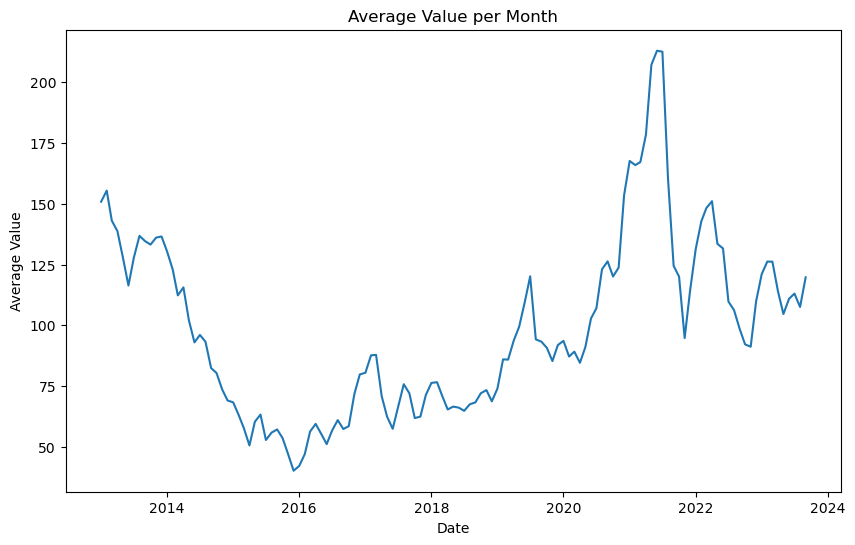

In [4]:
draw_graph(iron_ore_avg) # 철강석

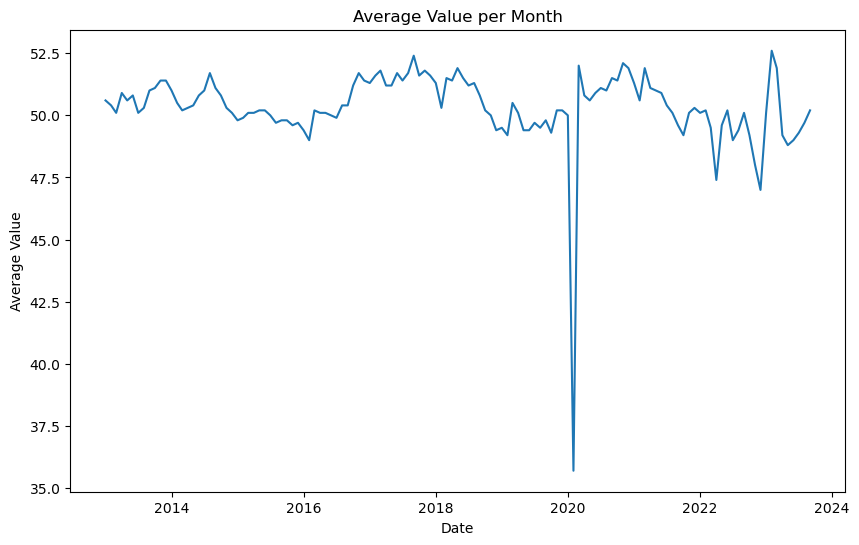

In [5]:
draw_graph(pmi) #pmi

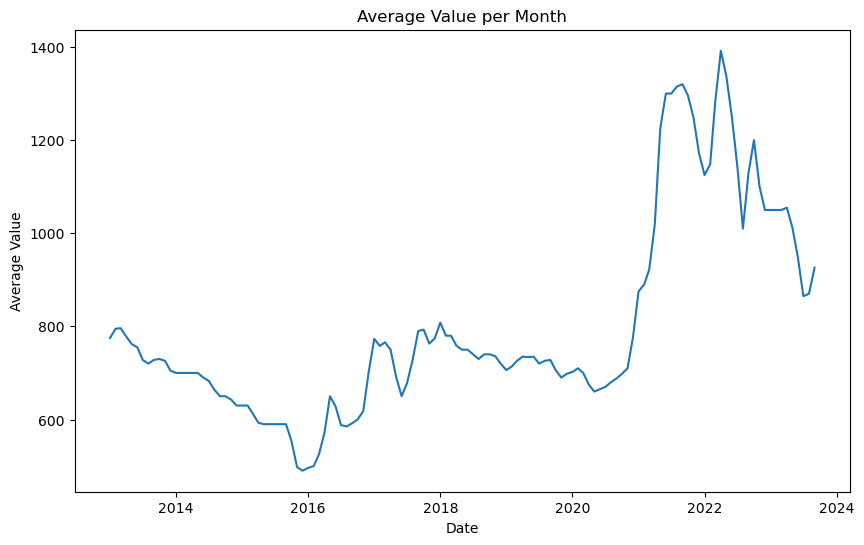

In [6]:
draw_graph(hot_rolled) #열연

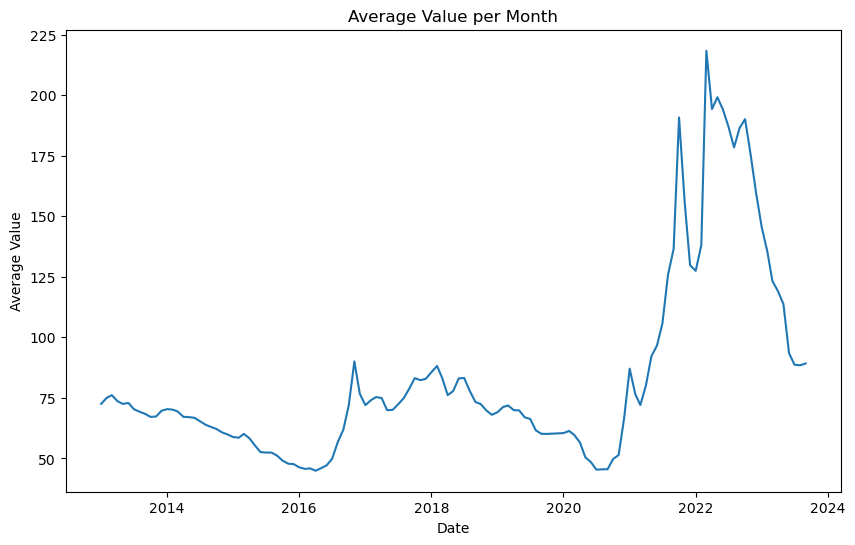

In [7]:
draw_graph(bituminous_cola_avg) #유연탄

In [8]:
hot_rolled = hot_rolled.sort_values('date')
hot_rolled.reset_index(drop=True, inplace=True)

bituminous_cola_avg.sort_values('date')
bituminous_cola_avg.reset_index(drop=True, inplace = True)

pmi = pmi.sort_values('date')
pmi.reset_index(drop=True, inplace = True)

iron_ore_avg = iron_ore_avg.sort_values('date')
iron_ore_avg.reset_index(drop=True, inplace = True)

In [9]:
hot_rolled['spread'] = hot_rolled['value'] - iron_ore_avg['value']
hot_rolled_spread = hot_rolled.drop('value', axis = 1)

In [10]:
df1 = hot_rolled_spread # 스프레드 (아연 - 철강석)
df2 = pmi
df3 = bituminous_cola_avg

In [11]:
df1.rename(columns = {'spread' : 'value'}, inplace = True)

#### 기본적인 데이터 불러오기 및 정리가 끝났고 이제 이들을 하나로 합친 지수 그래프 따로 만들 단계 !!

In [12]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체를 생성합니다.
scaler = StandardScaler()

# 각 데이터프레임의 'value' 열을 표준화합니다.
df1['value'] = scaler.fit_transform(df1[['value']])
df2['value'] = scaler.fit_transform(df2[['value']])
df3['value'] = scaler.fit_transform(df3[['value']])

ModuleNotFoundError: No module named 'sklearn'

### 저는 여기서 제일 단순하게 1:1:1 더하기를 사용했습니다. 가중치는 본인이 최적화 해주시면 됩니다

In [ ]:
df_index = df1
df_index['index'] = df1['value'] + df2['value'] + df3['value']
df_index = df_index.drop('value', axis = 1)

In [ ]:
df_index

,year,month,date,index,index_moving_avg,index_moving_short_avg,signal
0,2013,1,2013-01-01,-0.499111,-0.499111,-0.499111,0.0
1,2013,2,2013-02-01,-0.478973,-0.489042,-0.478973,1.0
2,2013,3,2013-03-01,-0.567802,-0.515295,-0.567802,0.0
3,2013,4,2013-04-01,-0.204010,-0.437474,-0.204010,1.0
4,2013,5,2013-05-01,-0.448343,-0.439648,-0.448343,0.0
...,...,...,...,...,...,...,...
124,2023,5,2023-05-01,0.922222,2.973593,0.922222,0.0
125,2023,6,2023-06-01,0.155291,2.574346,0.155291,0.0
126,2023,7,2023-07-01,-0.224697,2.257191,-0.224697,0.0
127,2023,8,2023-08-01,0.072215,2.019196,0.072215,0.0


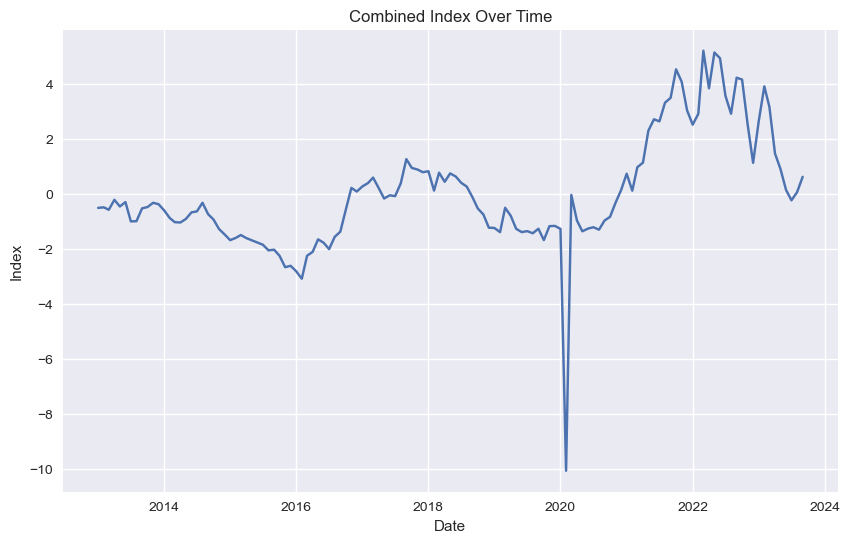

In [ ]:
# 표준화 작업 후 지수 그래프

plt.figure(figsize=(10, 6))
plt.plot(df_index['date'], df_index['index'])
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Combined Index Over Time')
plt.grid(True)
plt.show()

### 합친 지수 그래프로 이평선도 그리기 (이평선은 신호 생성을 위해 만듭니다)

<function matplotlib.pyplot.legend(*args, **kwargs)>

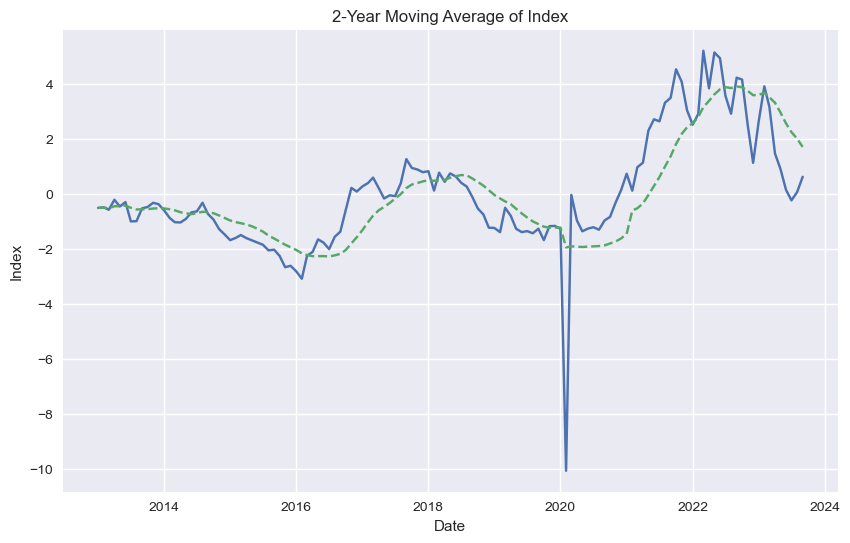

In [ ]:
# 'index' 열에 대해 2년 이동 평균을 계산합니다.
# min_periods=1로 설정하여 처음 2년 동안에도 이동 평균을 계산합니다.
df_index['index_moving_avg'] = df_index['index'].rolling(window=12, min_periods=1).mean()
df_index['index_moving_short_avg'] = df_index['index'].rolling(window=1, min_periods=1).mean()

# 그래프를 그립니다.
plt.figure(figsize=(10, 6))
plt.plot(df_index['date'], df_index['index_moving_short_avg'], label='Original Index')
plt.plot(df_index['date'], df_index['index_moving_avg'], label='2-Year Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('2-Year Moving Average of Index')
plt.legend

#### 매수 / 매도 신호 만들기. 금융 머신러닝 전략 비트코인 부분 참조하면 됩니다

In [ ]:
df_index['signal'] = np.where(df_index['index_moving_short_avg'] > df_index['index_moving_avg'], 1.0, 0.0) # 1.0이 매수를 의미함
df_index 

,year,month,date,index,index_moving_avg,index_moving_short_avg,signal
0,2013,1,2013-01-01,-0.499111,-0.499111,-0.499111,0.0
1,2013,2,2013-02-01,-0.478973,-0.489042,-0.478973,1.0
2,2013,3,2013-03-01,-0.567802,-0.515295,-0.567802,0.0
3,2013,4,2013-04-01,-0.204010,-0.437474,-0.204010,1.0
4,2013,5,2013-05-01,-0.448343,-0.439648,-0.448343,0.0
...,...,...,...,...,...,...,...
124,2023,5,2023-05-01,0.922222,2.973593,0.922222,0.0
125,2023,6,2023-06-01,0.155291,2.574346,0.155291,0.0
126,2023,7,2023-07-01,-0.224697,2.257191,-0.224697,0.0
127,2023,8,2023-08-01,0.072215,2.019196,0.072215,0.0


In [ ]:
buy_count = df_index[df_index['signal'] == 1.0].shape[0]
print("Signal 값이 1.0인 행의 개수는 {}개 입니다.".format(buy_count))

sell_count = df_index[df_index['signal'] == 0.0].shape[0]
print("Signal 값이 1.0인 행의 개수는 {}개 입니다.".format(sell_count))

Signal 값이 1.0인 행의 개수는 66개 입니다.
Signal 값이 1.0인 행의 개수는 63개 입니다.


### 실제 수익 백테스팅을 위해서 종목별 주가를 가져옵니다. 이 파일에서는 한국 포스코만 가져왔습니다. 외국 주가는 두번쨰 파일에 가져오는 과정이 있습니다

### 지금부터 종목별 주가 가져와서 종가 (가격)만 지수 그래프에 병합하는 과정을 보시면 됩니다

In [ ]:
import FinanceDataReader as fdr

# 삼성전자, 2013-01-01부터 현재까지
posco = fdr.DataReader('005490', '2013-01-01')

print(posco)

              Open    High     Low   Close   Volume    Change
Date                                                         
2013-01-02  355500  364000  352000  360500   312185  0.032951
2013-01-03  365000  373500  362000  370000   407269  0.026352
2013-01-04  374500  374500  365000  367000   195515 -0.008108
2013-01-07  369000  372500  365000  369000   148168  0.005450
2013-01-08  371500  371500  362500  364000   176732 -0.013550
...            ...     ...     ...     ...      ...       ...
2023-12-21  488500  499500  481500  486500   736449 -0.019153
2023-12-22  490500  492500  480000  480500   459588 -0.012333
2023-12-26  474500  481500  471500  473500   744558 -0.014568
2023-12-27  477500  508000  477500  492500  1346438  0.040127
2023-12-28  495500  502000  493000  499500   556422  0.014213

[2706 rows x 6 columns]


In [ ]:
# 'Date' 열을 datetime 타입으로 변환
posco_close = posco[['Close']]

posco_close.index = pd.to_datetime(posco_close.index)

# 월별 첫 날짜에 해당하는 'Close' 값을 선택
posco_close_first_day = posco_close.groupby([posco_close.index.year, posco_close.index.month]).first()

In [ ]:
posco_close_first_day = posco_close_first_day.head(129)

In [ ]:
posco_close_first_day

Close
Date Date        
2013 1     360500
     2     360000
     3     343000
     4     325000
     5     314000
...           ...
2023 5     382000
     6     361000
     7     402000
     8     621000
     9     560000

[129 rows x 1 columns]

In [ ]:
df_index

,year,month,date,index,index_moving_avg,index_moving_short_avg,signal
0,2013,1,2013-01-01,-0.499111,-0.499111,-0.499111,0.0
1,2013,2,2013-02-01,-0.478973,-0.489042,-0.478973,1.0
2,2013,3,2013-03-01,-0.567802,-0.515295,-0.567802,0.0
3,2013,4,2013-04-01,-0.204010,-0.437474,-0.204010,1.0
4,2013,5,2013-05-01,-0.448343,-0.439648,-0.448343,0.0
...,...,...,...,...,...,...,...
124,2023,5,2023-05-01,0.922222,2.973593,0.922222,0.0
125,2023,6,2023-06-01,0.155291,2.574346,0.155291,0.0
126,2023,7,2023-07-01,-0.224697,2.257191,-0.224697,0.0
127,2023,8,2023-08-01,0.072215,2.019196,0.072215,0.0


In [ ]:
# 첫 번째 데이터프레임의 인덱스를 리셋하면서 기존 인덱스는 삭제
posco_close_first_day = posco_close_first_day.reset_index(drop=True)

# 두 데이터프레임을 옆으로 붙이기
df_combined = pd.concat([df_index, posco_close_first_day], axis=1)

In [ ]:
df_combined # 완성된 프레임

,year,month,date,index,index_moving_avg,index_moving_short_avg,signal,Close
0,2013,1,2013-01-01,-0.499111,-0.499111,-0.499111,0.0,360500
1,2013,2,2013-02-01,-0.478973,-0.489042,-0.478973,1.0,360000
2,2013,3,2013-03-01,-0.567802,-0.515295,-0.567802,0.0,343000
3,2013,4,2013-04-01,-0.204010,-0.437474,-0.204010,1.0,325000
4,2013,5,2013-05-01,-0.448343,-0.439648,-0.448343,0.0,314000
...,...,...,...,...,...,...,...,...
124,2023,5,2023-05-01,0.922222,2.973593,0.922222,0.0,382000
125,2023,6,2023-06-01,0.155291,2.574346,0.155291,0.0,361000
126,2023,7,2023-07-01,-0.224697,2.257191,-0.224697,0.0,402000
127,2023,8,2023-08-01,0.072215,2.019196,0.072215,0.0,621000


### 매수랑 매도 신호에 따라 실제 거래 후 현금흐름 추적 그래프 그리는 단계 (바로 아래 코드는 백분율 지표 수익률)

In [ ]:
# 매수/매도에 따른 자산 변화를 저장할 리스트
asset_list = []  # 초기 자산을 1로 가정

# 매수 상태를 나타내는 변수 (매수하면 True, 매도하면 False)
buy_flag = False

# 매수한 가격을 저장하는 변수
buy_price = 0

# 데이터프레임의 각 행을 순회하면서 매수/매도 신호에 따라 작업을 수행
for i, row in df_combined.iterrows():
    # 매수 신호가 나왔고, 아직 매수하지 않은 상태라면 매수를 진행
    if row['signal'] == 1.0 and not buy_flag:
        buy_flag = True
        buy_price = row['Close']
        asset_list.append(1)  # 매수 직후에는 자산 변화가 없음
        
    # 매도 신호가 나왔고, 매수한 상태라면 매도를 진행
    elif row['signal'] == 0.0 and buy_flag:
        buy_flag = False
        # 이번 달 가격 / 매수 당시 가격으로 수익률을 계산
        profit_rate = row['Close'] / buy_price
        # 이전 자산에 수익률을 곱해서 새 자산을 계산
        asset = asset_list[-1] * profit_rate
        asset_list.append(asset)
        
    # 매수 상태면서 매도 신호가 아직 오지 않았다면, 현재 가격에 따른 자산 변화를 계산해서 추가
    elif buy_flag and row['signal'] != 0.0:
        profit_rate = row['Close'] / buy_price
        asset = asset_list[-1] * profit_rate
        asset_list.append(asset)
        
    # 매수 상태가 아니라면 자산 변화가 없으므로 이전 자산을 그대로 사용
    else:
        asset_list.append(asset_list[-1] if asset_list else 1)  # 첫 행의 경우 asset_list가 비어있으므로 1을 사용

# 자산 변화를 데이터프레임에 추가
df_combined['asset'] = asset_list


### 매수랑 매도 신호에 따라 실제 거래 후 현금흐름 추적 그래프 그리는 단계 (바로 아래 코드는 단순 더하기 빼기 수익 흐름.. 저는 이 방법으로 추적했습니다)

In [ ]:
# 매수/매도에 따른 자산 변화를 저장할 리스트
asset_diff_list = []

# 매수 상태를 나타내는 변수 (매수하면 True, 매도하면 False)
buy_flag = False

# 매수한 가격을 저장하는 변수
buy_price = 0

# 데이터프레임의 각 행을 순회하면서 매수/매도 신호에 따라 작업을 수행
for i, row in df_combined.iterrows():
    # 매수 신호가 나왔고, 아직 매수하지 않은 상태라면 매수를 진행
    if row['signal'] == 1.0 and not buy_flag:
        buy_flag = True
        buy_price = row['Close']
        asset_diff_list.append(0)  # 매수 직후에는 변화 없음

    # 매도 신호가 나왔고, 매수한 상태라면 매도를 진행
    elif row['signal'] == 0.0 and buy_flag:
        buy_flag = False
        # 매도 종가 - 매수 종가로 가격 차이를 계산
        price_diff = row['Close'] - buy_price
        asset_diff_list.append(price_diff)

    # 매수 상태면서 매도 신호가 아직 오지 않았다면, 가격 변화를 계산해서 추가
    elif buy_flag and row['signal'] != 0.0:
        price_diff = row['Close'] - buy_price
        asset_diff_list.append(price_diff)

    # 매수 상태가 아니라면 가격 변화가 없으므로 이전 값을 그대로 사용
    else:
        asset_diff_list.append(asset_diff_list[-1] if asset_diff_list else 0)  # 첫 행의 경우 asset_diff_list가 비어있으므로 0을 사용

# 가격 변화를 데이터프레임에 추가
df_combined['asset_diff'] = asset_diff_list


#### 완성된 그래프

C:\Users\dlrmf\AppData\Local\Temp\ipykernel_20200\1682592246.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


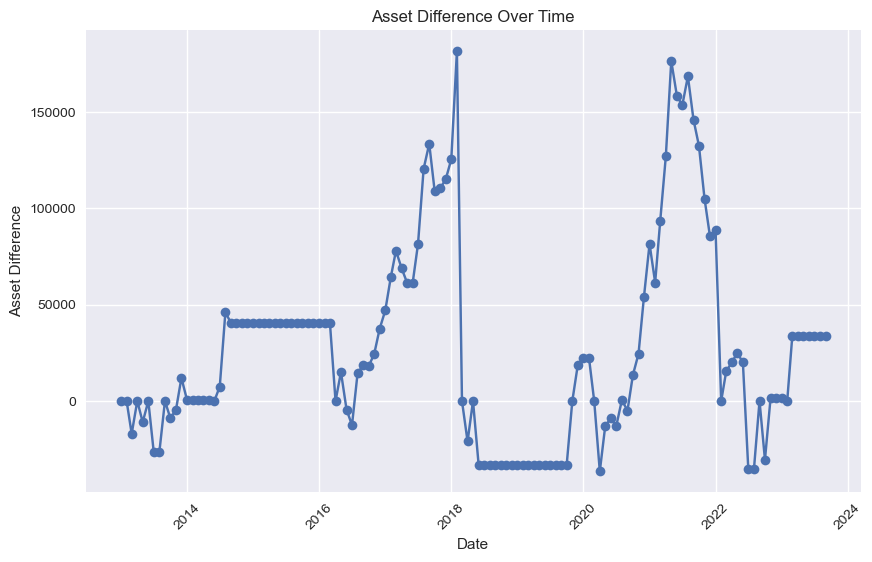

In [ ]:
import matplotlib.pyplot as plt

# matplotlib의 스타일을 설정
plt.style.use('seaborn')

# 그래프를 그릴 데이터를 설정 (x축: 날짜, y축: asset_diff)
x_data = df_combined['date']
y_data = df_combined['asset_diff']

# 그래프를 그림
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정
plt.plot(x_data, y_data, marker='o')  # 꺾은선 그래프를 그림, 각 점에 마커를 표시
plt.title('Asset Difference Over Time')  # 그래프의 제목을 설정
plt.xlabel('Date')  # x축의 라벨을 설정
plt.ylabel('Asset Difference')  # y축의 라벨을 설정
plt.xticks(rotation=45)  # x축의 라벨을 45도 회전
plt.grid(True)  # 그리드를 표시

# 그래프를 화면에 표시


C:\Users\dlrmf\AppData\Local\Temp\ipykernel_20200\1682592246.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


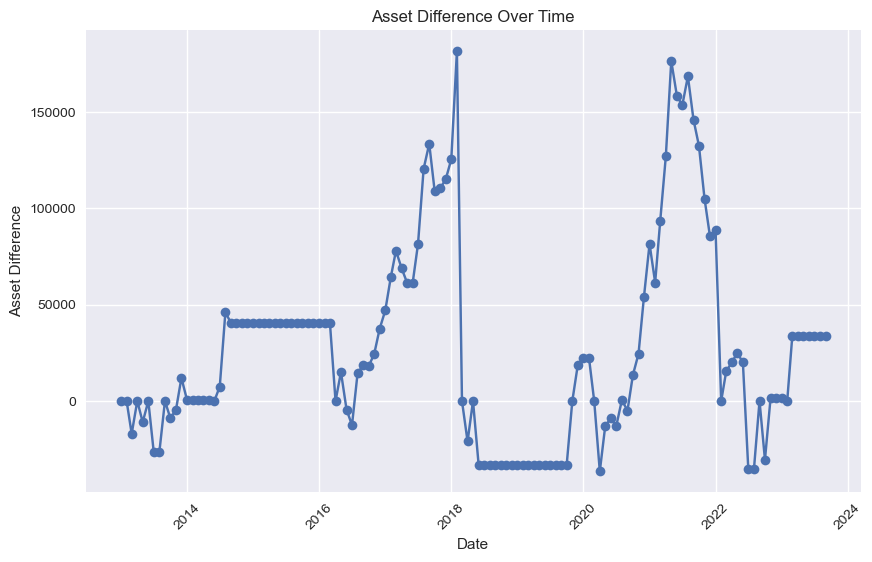

In [ ]:
import matplotlib.pyplot as plt

# matplotlib의 스타일을 설정
plt.style.use('seaborn')

# 그래프를 그릴 데이터를 설정 (x축: 날짜, y축: asset_diff)
x_data = df_combined['date']
y_data = df_combined['asset_diff']

# 그래프를 그림
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정
plt.plot(x_data, y_data, marker='o')  # 꺾은선 그래프를 그림, 각 점에 마커를 표시
plt.title('Asset Difference Over Time')  # 그래프의 제목을 설정
plt.xlabel('Date')  # x축의 라벨을 설정
plt.ylabel('Asset Difference')  # y축의 라벨을 설정
plt.xticks(rotation=45)  # x축의 라벨을 45도 회전
plt.grid(True)  # 그리드를 표시

# 그래프를 화면에 표시


### 아래 그래프는 표준화를 거치지 않은 지수 그래프... 참고용으로만 보시면 되겠습니다

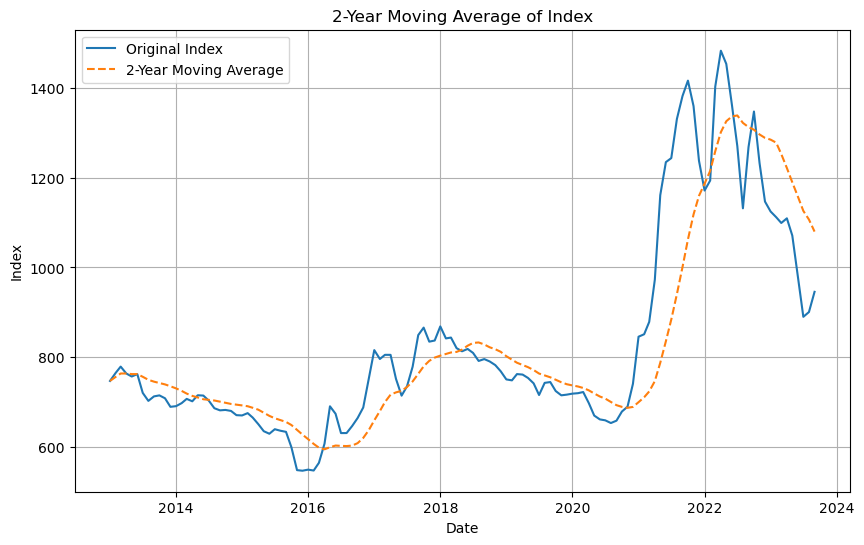

In [ ]:
dfdf['index_moving_avg'] = dfdf['index'].rolling(window=12, min_periods = 1).mean()

plt.figure(figsize=(10, 6))
plt.plot(dfdf['date'], dfdf['index'], label='Original Index')
plt.plot(dfdf['date'], dfdf['index_moving_avg'], label='2-Year Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('2-Year Moving Average of Index')
plt.legend()
plt.grid(True)
plt.show()

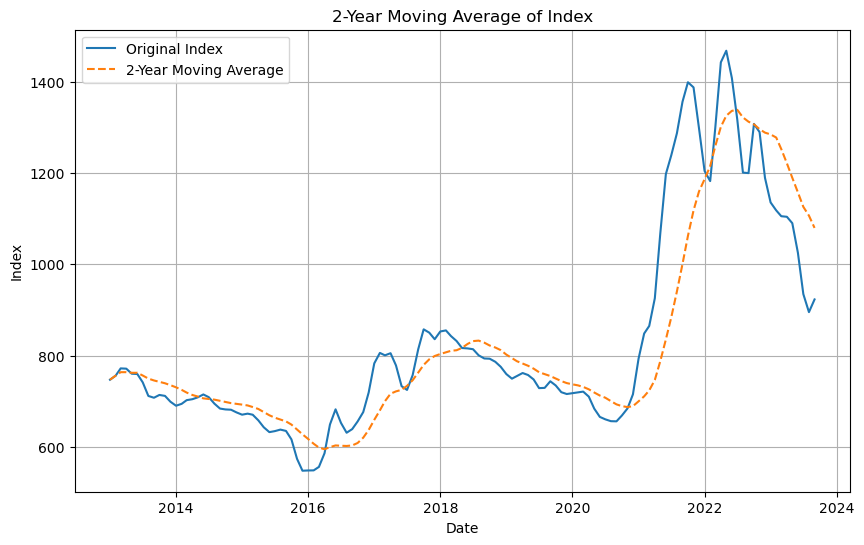

In [ ]:
dfdf['index_moving_avg'] = dfdf['index'].rolling(window=12, min_periods = 1).mean()
dfdf['index_moving_short_avg'] = dfdf['index'].rolling(window=2, min_periods = 1).mean()

plt.figure(figsize=(10, 6))
plt.plot(dfdf['date'], dfdf['index_moving_short_avg'], label='Original Index')
plt.plot(dfdf['date'], dfdf['index_moving_avg'], label='2-Year Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('2-Year Moving Average of Index')
plt.legend()
plt.grid(True)
plt.show()